In [1]:
!pip install gensim

In [2]:
import pandas as pd
import json
from gensim.models.word2vec import Word2Vec
# Load Association
df_single_count = pd.read_csv("C:/Users/arisa/StackOverflow-Project/dataset/Single_Word_Count.csv")
df_pair_count = pd.read_csv("C:/Users/arisa/StackOverflow-Project/dataset/Pair_Word_Count.csv")
# Load Gensim
model_name = "C:/Users/arisa/StackOverflow-Project/dataset/stackoverflow.model"
model_w2v = Word2Vec.load(model_name)
w2v_df = pd.DataFrame(model_w2v.wv.vectors, index = model_w2v.wv.index_to_key)
w2v_df = w2v_df.reset_index()
w2v_df.columns = ["Word", "X1", "X2", "X3", "X4", "X5"]
# Load Categories
tag_dict = json.load(open('C:/Users/arisa/StackOverflow-Project/dataset/tag_dict.json','r'))
category_dict = json.load(open('C:/Users/arisa/StackOverflow-Project/dataset/category_dict.json','r'))

languages = category_dict['programming'] + category_dict['language'] + category_dict['languages']
libraries = category_dict['library'] + category_dict['libraries'] + category_dict['framework'] + category_dict['frameworks'] + category_dict['package'] + category_dict['packages']

# Load Definitions
df_excerpts = pd.read_csv("C:/Users/arisa/StackOverflow-Project/dataset/tagwiki.csv",skiprows = 1)

In [3]:
df_excerpts.columns

Index(['excerpt_last_edit_date', 'body_last_edit_date', 'excerpt', 'tag_name'], dtype='object')

library, libraries, framework, frameworks, package, packages

In [4]:
len(libraries)

2303

In [5]:
len(languages)

835

# Input Tidyverse

In [6]:
print("All Possible Libraries")
print(libraries)

input_library = input("Input your library: ")

All Possible Libraries
['.a', 'aasm', 'abseil', 'achartengine', 'acid-state', 'acra', 'actionbarsherlock', 'advapi32', 'aether', 'afnetworking-2', 'afnetworking-3', 'afnetworking', 'agility.js', 'alamofire', 'alamofireimage', 'alasql', 'algebird', 'allegro', 'amcharts', 'amfphp', 'android-afilechooser', 'android-bootstrap-widgets', 'android-holo-everywhere', 'android-ibeacon', 'android-kenburnsview', 'android-ksoap2', 'android-library', 'android-lvl', 'android-volley', 'androidviewclient', 'angelscript', 'angular2-jwt', 'angular-google-maps', 'anime.js', 'anko', 'annyang', 'anychart', 'apache-commons-config', 'apache-commons-httpclient', 'apache-commons-io', 'apache-commons-math', 'apache-httpclient-4.x', 'apache-httpcomponents', 'apache-kafka-streams', 'apache-poi', 'apollo-client', 'appframework', 'apr', 'aquery', 'argonaut', 'argonaut', 'armadillo', 'arrayfire', 'aruco', 'asp.net-mvc-awesome', 'assimp', 'asynchttpclient', 'atl', 'attoparsec', 'autofixture', 'axiom', 'backbone-model'

Input your library: tidyverse


In [7]:
k = len(w2v_df)
similar_words = model_w2v.wv.most_similar(positive = [input_library], topn = len(w2v_df))
similar_libraries = []

for word, score in similar_words:
    if (word in libraries):
        try:
            excerpt_df = df_excerpts[df_excerpts["tag_name"] == word][["excerpt"]]
            excerpt = excerpt_df.loc[excerpt_df.index[0], "excerpt"]
            similar_libraries.append({"library": word, "similarity": score, "language": "unknown", "definition": excerpt})
        except:
            similar_libraries.append({"library": word, "similarity": score, "language": "unknown", "definition": "Not Found"})

In [8]:
for x in similar_libraries:
    library = x["library"]
    score = x["similarity"]
    df_pair_filter = df_pair_count[df_pair_count["Word1"] == library]
    df_pair_filter = df_pair_filter.sort_values(by = "Count", ascending = False)
    for i in df_pair_filter.index:
        candidate_language = df_pair_filter.loc[i, "Word2"]
        if candidate_language in languages:
            x["language"] = candidate_language
            break

In [9]:
similar_libraries_copy = []
for x in similar_libraries:
    if x["language"] != "unknown" and (len(similar_libraries_copy) < k):
        similar_libraries_copy.append(x)
similar_libraries = similar_libraries_copy

In [10]:
print(f"Input library: {input_library}")
print(f"Similar libraries found (top {k}): ")

for i in range(len(similar_libraries)):
    x = similar_libraries[i]
    print("----------------------------------")
    print(f"Library {i + 1}: {x['library']} (Similarity: {x['similarity']: .3f})")
    print(f"Language: {x['language']}")
    print(f"Description: {x['definition']}")

Input library: tidyverse
Similar libraries found (top 8622): 
----------------------------------
Library 1: tidyr (Similarity:  0.999)
Language: r
Description: tidyr is an R package by Hadley Wickham for cleaning and reshaping data, designed to use the magrittr pipe (%&gt;%) so as to interact well with dplyr and similar pipeable packages which emphasize tidy data. tidyr is the successor to reshape2.
----------------------------------
Library 2: lubridate (Similarity:  0.996)
Language: r
Description: lubridate is an R package that makes it easier to work with dates and time objects.
----------------------------------
Library 3: sqldf (Similarity:  0.996)
Language: r
Description: SQLDF is an R package for running SQL statements on R data frames.
----------------------------------
Library 4: reshape2 (Similarity:  0.995)
Language: r
Description: The reshape2 package in R contains functions that allow data to be transformed into more convenient forms.

----------------------------------
Li

----------------------------------
Library 478: jgit (Similarity:  0.353)
Language: java
Description: JGit is an EDL (new-style BSD) licensed, lightweight, pure Java library implementing the Git version control system.
----------------------------------
Library 479: vue.js (Similarity:  0.352)
Language: javascript
Description: Vue.js is an open-source, progressive JavaScript framework for building user interfaces that aims to be incrementally adoptable. Vue.js is mainly used for front-end development and requires an intermediate level of HTML and CSS. Vue.js questions are highly version specific and should always be tagged with [vuejs2] or [vuejs3] in addition to this tag.
----------------------------------
Library 480: django-1.6 (Similarity:  0.349)
Language: python
Description: Django 1.6 is a version of the Django framework, released November 2013. Please only use this tag if your question relates specifically to this version.
----------------------------------
Library 481: jena (S

<BarContainer object of 780 artists>

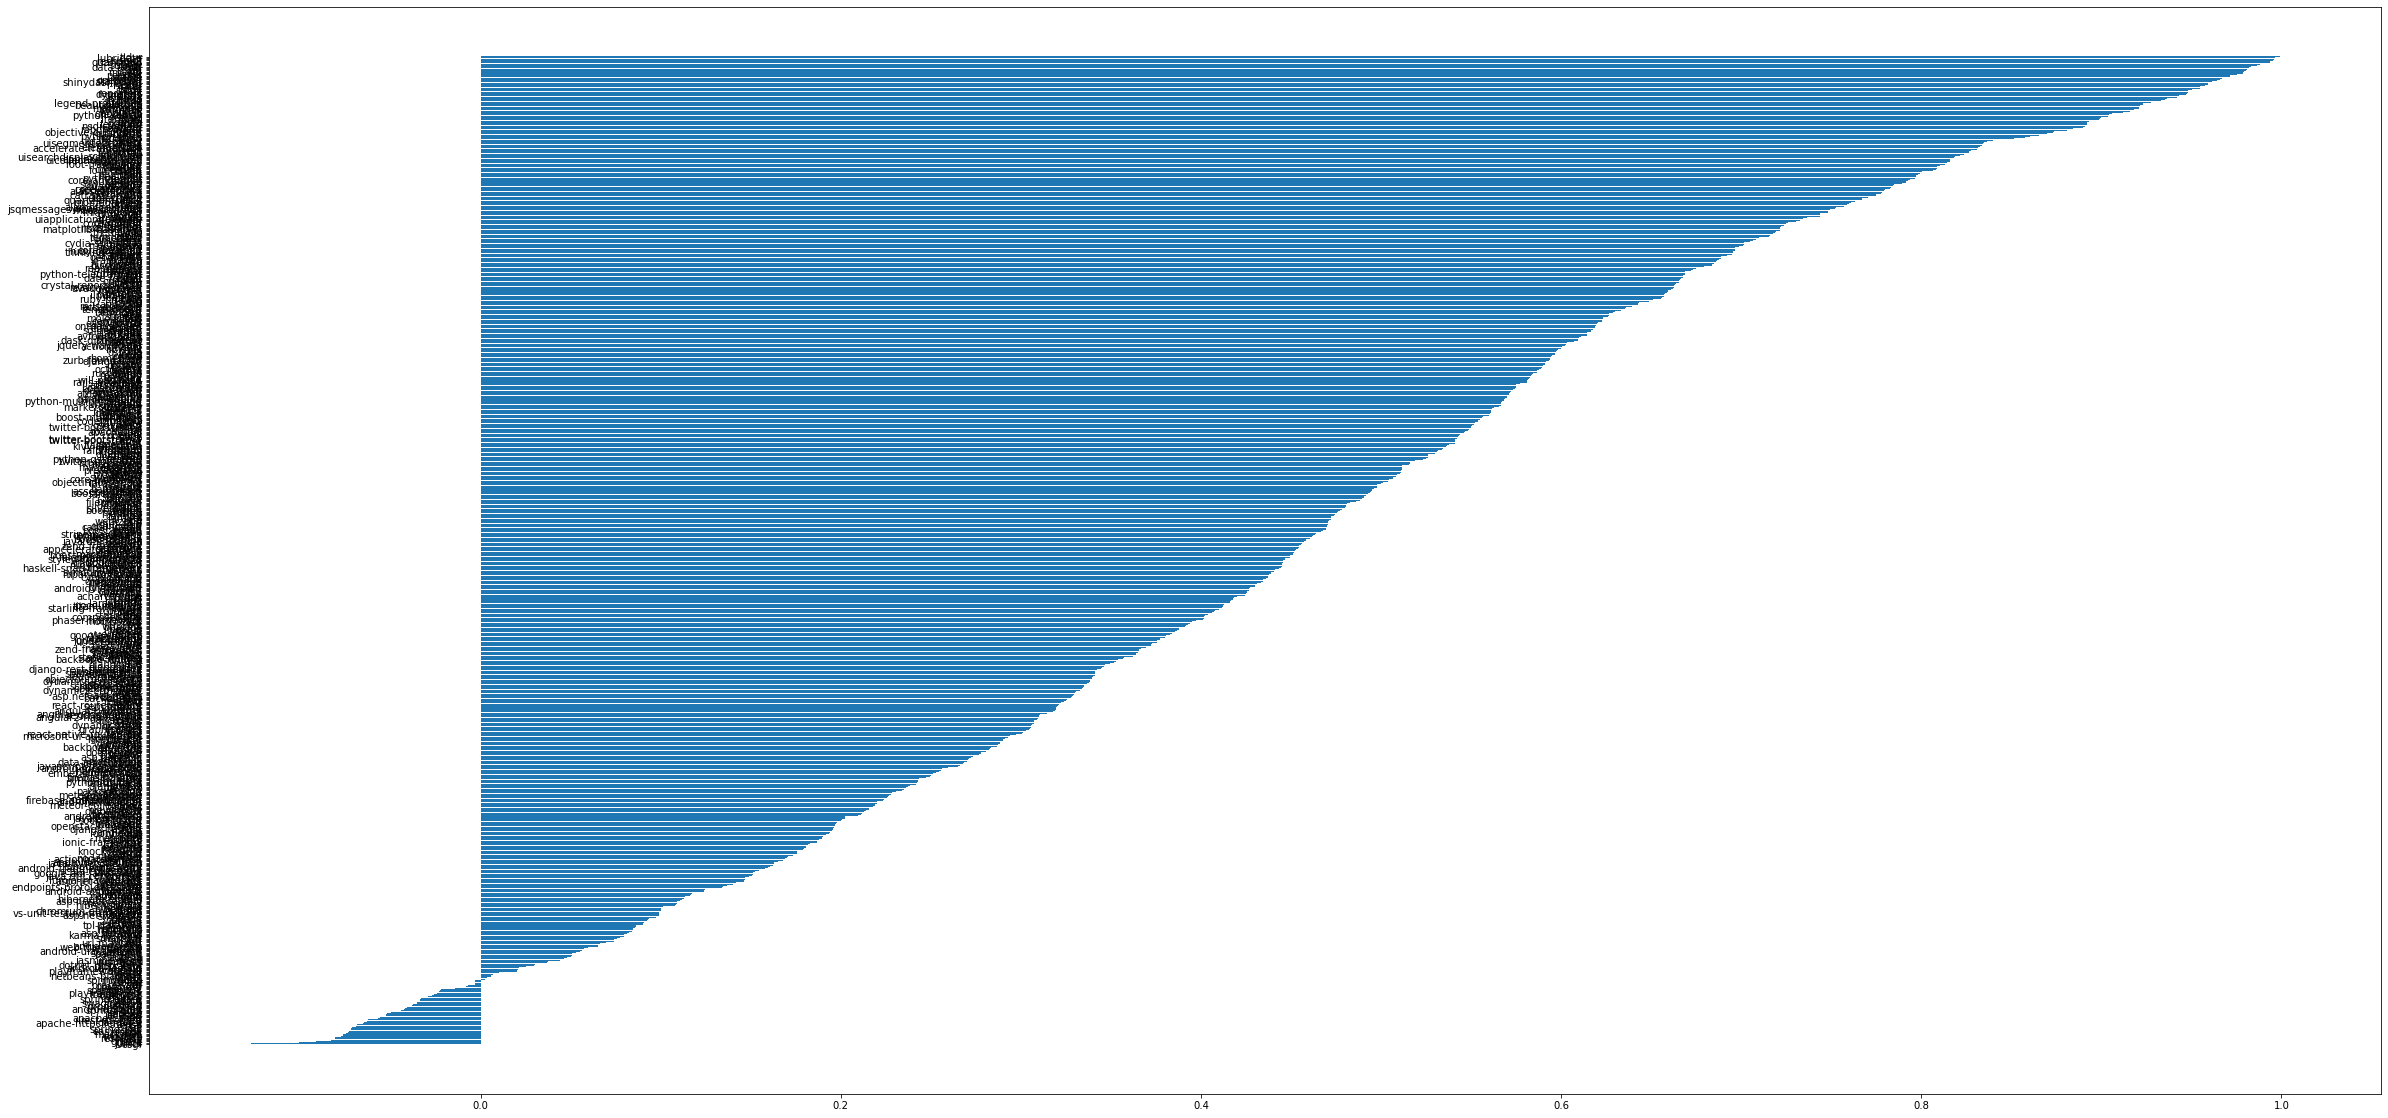

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (40,20))
#[x["similar_libraries"] for x in similar_libraries]

plt.barh([x["library"] for x in similar_libraries][::-1], [x["similarity"] for x in similar_libraries][::-1])

(array([ 44.,  57.,  80.,  89.,  97., 118., 111.,  73.,  54.,  57.]),
 array([-0.12760898, -0.01493069,  0.09774761,  0.21042591,  0.32310421,
         0.43578251,  0.54846081,  0.6611391 ,  0.7738174 ,  0.8864957 ,
         0.999174  ]),
 <BarContainer object of 10 artists>)

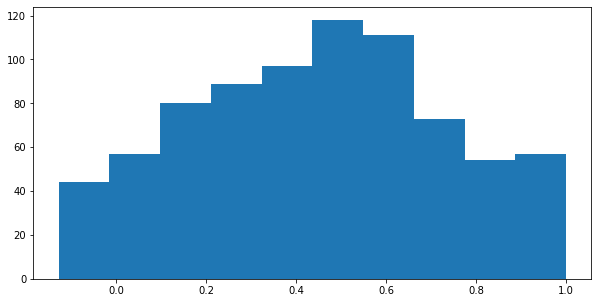

In [12]:
fig = plt.figure(figsize = (10, 5))

plt.hist([x["similarity"] for x in similar_libraries][::-1])

# Input Numpy

In [21]:
print("All Possible Libraries")
print(libraries)

input_library = input("Input your library: ")

All Possible Libraries
['.a', 'aasm', 'abseil', 'achartengine', 'acid-state', 'acra', 'actionbarsherlock', 'advapi32', 'aether', 'afnetworking-2', 'afnetworking-3', 'afnetworking', 'agility.js', 'alamofire', 'alamofireimage', 'alasql', 'algebird', 'allegro', 'amcharts', 'amfphp', 'android-afilechooser', 'android-bootstrap-widgets', 'android-holo-everywhere', 'android-ibeacon', 'android-kenburnsview', 'android-ksoap2', 'android-library', 'android-lvl', 'android-volley', 'androidviewclient', 'angelscript', 'angular2-jwt', 'angular-google-maps', 'anime.js', 'anko', 'annyang', 'anychart', 'apache-commons-config', 'apache-commons-httpclient', 'apache-commons-io', 'apache-commons-math', 'apache-httpclient-4.x', 'apache-httpcomponents', 'apache-kafka-streams', 'apache-poi', 'apollo-client', 'appframework', 'apr', 'aquery', 'argonaut', 'argonaut', 'armadillo', 'arrayfire', 'aruco', 'asp.net-mvc-awesome', 'assimp', 'asynchttpclient', 'atl', 'attoparsec', 'autofixture', 'axiom', 'backbone-model'

Input your library: numpy


In [22]:
k = 5
similar_words = model_w2v.wv.most_similar(positive = [input_library], topn = len(w2v_df))
similar_libraries = []

for word, score in similar_words:
    if (word in libraries):
        try:
            excerpt_df = df_excerpts[df_excerpts["tag_name"] == word][["excerpt"]]
            excerpt = excerpt_df.loc[excerpt_df.index[0], "excerpt"]
            similar_libraries.append({"library": word, "similarity": score, "language": "unknown", "definition": excerpt})
        except:
            similar_libraries.append({"library": word, "similarity": score, "language": "unknown", "definition": "Not Found"})

In [23]:
for x in similar_libraries:
    library = x["library"]
    score = x["similarity"]
    df_pair_filter = df_pair_count[df_pair_count["Word1"] == library]
    df_pair_filter = df_pair_filter.sort_values(by = "Count", ascending = False)
    for i in df_pair_filter.index:
        candidate_language = df_pair_filter.loc[i, "Word2"]
        if candidate_language in languages:
            x["language"] = candidate_language
            break

In [24]:
similar_libraries_copy = []
for x in similar_libraries:
    if x["language"] != "unknown" and (len(similar_libraries_copy) < k):
        similar_libraries_copy.append(x)
similar_libraries = similar_libraries_copy

In [25]:
print(f"Input library: {input_library}")
print(f"Similar libraries found (top {k}): ")

for i in range(len(similar_libraries)):
    x = similar_libraries[i]
    print("----------------------------------")
    print(f"Library {i + 1}: {x['library']} (Similarity: {x['similarity']: .3f})")
    print(f"Language: {x['language']}")
    print(f"Description: {x['definition']}")

Input library: numpy
Similar libraries found (top 5): 
----------------------------------
Library 1: octave (Similarity:  0.997)
Language: matlab
Description: GNU Octave is a free and open-source mathematical software package and scripting language. The scripting language is intended to be compatible with MATLAB, but the two packages are not interchangeable. Don’t use both the [matlab] and [octave] tags, unless the question is explicitly about the similarities or differences between the two.
----------------------------------
Library 2: rpart (Similarity:  0.995)
Language: r
Description: An R package for fitting classification and regression trees.
----------------------------------
Library 3: python-xarray (Similarity:  0.992)
Language: python
Description: xarray (formerly xray) is an open source library that provides a range of N-dimensional data structures.
----------------------------------
Library 4: scipy (Similarity:  0.989)
Language: python
Description: SciPy is an open source 

<BarContainer object of 5 artists>

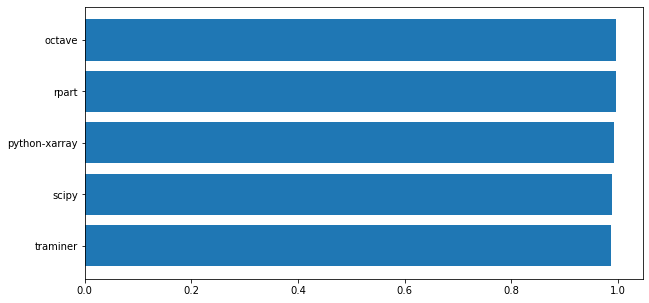

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
#[x["similar_libraries"] for x in similar_libraries]

plt.barh([x["library"] for x in similar_libraries][::-1], [x["similarity"] for x in similar_libraries][::-1])

(array([ 41.,  59.,  92., 114.,  95.,  73.,  84., 101.,  95.,  26.]),
 array([0.0147766 , 0.11204762, 0.20931865, 0.30658967, 0.40386069,
        0.50113172, 0.59840274, 0.69567377, 0.79294479, 0.89021582,
        0.98748684]),
 <BarContainer object of 10 artists>)

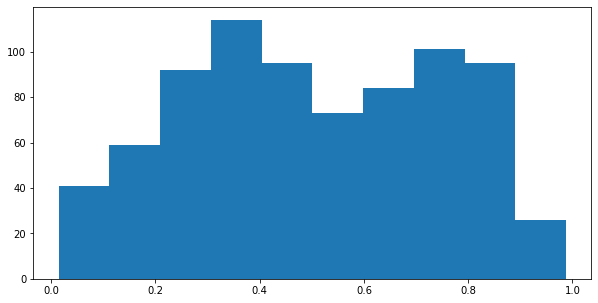

In [19]:
fig = plt.figure(figsize = (10, 5))

plt.hist([x["similarity"] for x in similar_libraries][::-1])

# Input matplotlib

In [20]:
print("All Possible Libraries")
print(libraries)

input_library = input("Input your library: ")

All Possible Libraries
['.a', 'aasm', 'abseil', 'achartengine', 'acid-state', 'acra', 'actionbarsherlock', 'advapi32', 'aether', 'afnetworking-2', 'afnetworking-3', 'afnetworking', 'agility.js', 'alamofire', 'alamofireimage', 'alasql', 'algebird', 'allegro', 'amcharts', 'amfphp', 'android-afilechooser', 'android-bootstrap-widgets', 'android-holo-everywhere', 'android-ibeacon', 'android-kenburnsview', 'android-ksoap2', 'android-library', 'android-lvl', 'android-volley', 'androidviewclient', 'angelscript', 'angular2-jwt', 'angular-google-maps', 'anime.js', 'anko', 'annyang', 'anychart', 'apache-commons-config', 'apache-commons-httpclient', 'apache-commons-io', 'apache-commons-math', 'apache-httpclient-4.x', 'apache-httpcomponents', 'apache-kafka-streams', 'apache-poi', 'apollo-client', 'appframework', 'apr', 'aquery', 'argonaut', 'argonaut', 'armadillo', 'arrayfire', 'aruco', 'asp.net-mvc-awesome', 'assimp', 'asynchttpclient', 'atl', 'attoparsec', 'autofixture', 'axiom', 'backbone-model'

KeyboardInterrupt: Interrupted by user

In [ ]:
k = len(w2v_df)
similar_words = model_w2v.wv.most_similar(positive = [input_library], topn = len(w2v_df))
similar_libraries = []

for word, score in similar_words:
    if (word in libraries):
        try:
            excerpt_df = df_excerpts[df_excerpts["tag_name"] == word][["excerpt"]]
            excerpt = excerpt_df.loc[excerpt_df.index[0], "excerpt"]
            similar_libraries.append({"library": word, "similarity": score, "language": "unknown", "definition": excerpt})
        except:
            similar_libraries.append({"library": word, "similarity": score, "language": "unknown", "definition": "Not Found"})

In [ ]:
for x in similar_libraries:
    library = x["library"]
    score = x["similarity"]
    df_pair_filter = df_pair_count[df_pair_count["Word1"] == library]
    df_pair_filter = df_pair_filter.sort_values(by = "Count", ascending = False)
    for i in df_pair_filter.index:
        candidate_language = df_pair_filter.loc[i, "Word2"]
        if candidate_language in languages:
            x["language"] = candidate_language
            break

In [ ]:
similar_libraries_copy = []
for x in similar_libraries:
    if x["language"] != "unknown" and (len(similar_libraries_copy) < k):
        similar_libraries_copy.append(x)
similar_libraries = similar_libraries_copy

In [ ]:
print(f"Input library: {input_library}")
print(f"Similar libraries found (top {k}): ")

for i in range(len(similar_libraries)):
    x = similar_libraries[i]
    print("----------------------------------")
    print(f"Library {i + 1}: {x['library']} (Similarity: {x['similarity']: .3f})")
    print(f"Language: {x['language']}")
    print(f"Description: {x['definition']}")

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (40,20))
#[x["similar_libraries"] for x in similar_libraries]

plt.barh([x["library"] for x in similar_libraries][::-1], [x["similarity"] for x in similar_libraries][::-1])

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.hist([x["similarity"] for x in similar_libraries][::-1])